# 02. Exploratory Data Analysis (EDA)

## Executive Summary
This notebook focuses on the visual and statistical exploration of the cleaned Netflix dataset. 
**Objective**: Uncover underlying patterns, detect anomalies, and validate hypotheses regarding content distribution, geographic concentration, and temporal trends.

### Key Analytical Dimensions:
1.  **Data Quality Validation**: Assessing the impact of the 'Not Given' director category.
2.  **Catalog Composition**: Ratio of Movies vs. TV Shows.
3.  **Geographic & Temporal Trends**: Content growth over time and primary source markets.
4.  **Content Profiling**: Duration distributions and maturity ratings taxonomy.

## 1. Environment Parsing & Data Ingestion

**Objective**: Configure the plotting style for professional reporting and load the processed Parquet dataset for optimal performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')
sns.color_palette("flare", as_cmap=True)
plt.rcParams['figure.figsize'] = (10, 6)

import sys
sys.path.append('..')

import config 
df = pd.read_parquet(config.NETFLIX_CLEANED_FILE)

df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration_minutes,duration_seasons,genre_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90.0,NaN,[Documentaries]
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,NaN,1.0,"[Crime TV Shows, International TV Shows, TV Ac..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,NaN,1.0,"[TV Dramas, TV Horror, TV Mysteries]"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91.0,NaN,"[Children & Family Movies, Comedies]"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125.0,NaN,"[Dramas, Independent Movies, International Mov..."


## 2. Missing Value Investigation: The 'Not Given' Paradigm

**Context**: During the audit phase, we identified that missing director values are encoded as `'Not Given'` rather than standard `NaN`.

**Task**: Visualize the proportion of records with known vs. unknown directors. 
**Hypothesis Testing**: Is the absence of director information systematically correlated with specific content types (e.g., TV Shows)?

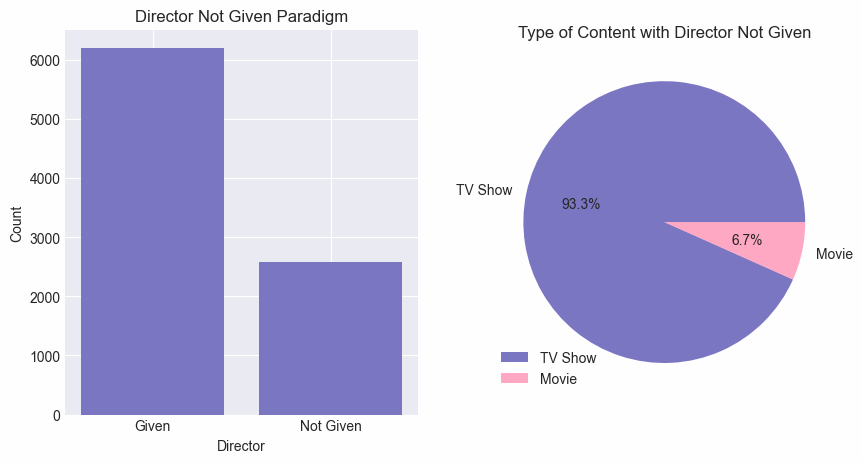

In [2]:
director_not_null = df[df['director'] != 'Unknown'].to_numpy()
director_null = df[df['director'] == 'Unknown'].to_numpy()

df_director_null = df[df['director'] == 'Unknown']

fig,ax = plt.subplots(1,2, figsize=(10,5))
ax[0].bar(['Given', 'Not Given'], [director_not_null.shape[0], director_null.shape[0]])
ax[0].set_title('Director Not Given Paradigm')
ax[0].set_xlabel('Director')
ax[0].set_ylabel('Count')

ax[1].pie(df_director_null['type'].value_counts(), labels=df_director_null['type'].value_counts().index, autopct='%1.1f%%')
ax[1].set_title('Type of Content with Director Not Given')
ax[1].legend()
plt.show()

## 3. Catalog Composition Analysis

**Objective**: Determine the dominance of content types within the platform.
**Visualization**: Generate a distribution plot (Pie or Bar Chart) to quantify the split between `Movie` and `TV Show`.

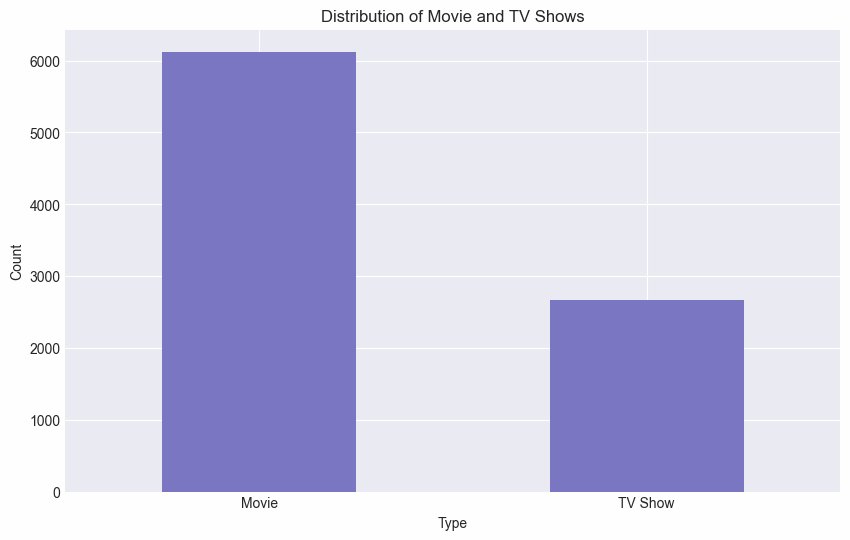

In [3]:
df_types = df['type'].value_counts()


fig, ax = plt.subplots()
df_types.plot(kind='bar', ax=ax)
ax.set_title('Distribution of Movie and TV Shows')
ax.set_xlabel('Type')
ax.set_ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## 4. Geographic Distribution of Content

**Objective**: Identify the primary markets driving content production.
**Task**: Perform a frequency analysis on the `country` column and visualize the Top 10 producing nations.

In [4]:
df_country = df[df['country'] != 'Not Given']['country'].value_counts().head(10)
df_country

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Mexico             138
Name: count, dtype: int64

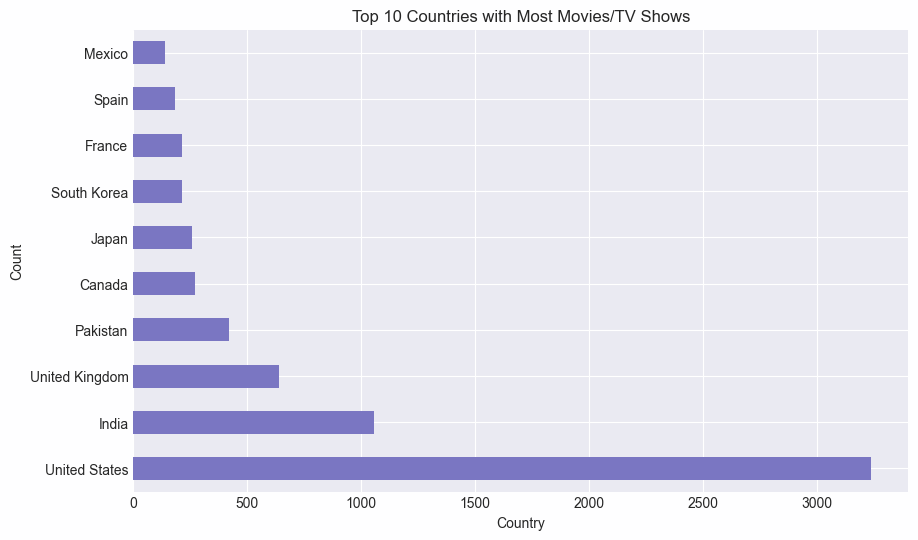

In [5]:
df_country = df[df['country'] != 'Not Given']['country'].value_counts().head(10)
df_country.plot(kind='barh')
ax = plt.gca()
ax.set_title('Top 10 Countries with Most Movies/TV Shows')
ax.set_xlabel('Country')
ax.set_ylabel('Count')
plt.show()


## 5. Temporal Trend Analysis

**Objective**: Analyze the catalog growth trajectory over the last decade.
**Task**: Construct a time-series visualization using `release_year` (or `date_added`) to demonstrate the volume of content added annually.

## 6. Content Duration Profiling

**Objective**: Understand the standard runtime distribution for different content segments.

*   **Movies**: Analyze the distribution of `duration_minutes`. Identify the mean runtime and detect outliers (e.g., short films vs. epics).
*   **TV Shows**: Analyze the frequency distribution of `duration_seasons`. Is the catalog skewed towards miniseries (1 season) or long-running franchises?

## 7. Advanced Segmentation: Ratings & Genre Taxonomy

**Objective**: Classify the target audience and thematic diversity.

*   **Ratings**: Determine the most prevalent maturity rating (e.g., TV-MA, PG-13).
*   **Genres**: (Optional) Unnest the `genre_list` feature to rank the most popular genres across the entire platform.